In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear,relu,sigmoid

In [37]:
x = np.load("data\X.npy")
y = np.load("data\Y.npy")
x.shape, y.shape # check dimensions

((5000, 400), (5000, 1))

In [38]:
def widgvis(fig):
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False

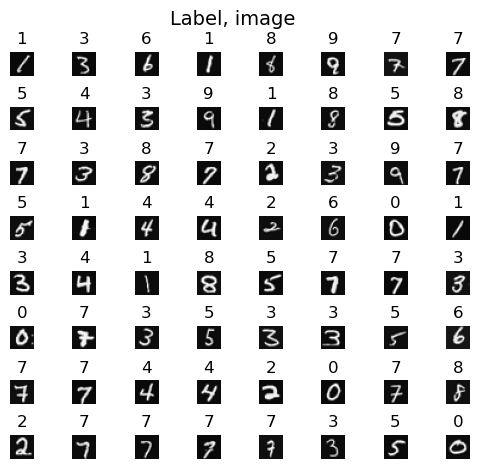

In [39]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
m, n = x.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

#fig.tight_layout(pad=0.5)
widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = x[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

In [40]:
# Sequential model
tf.random.set_seed(30) # consistent result
model = Sequential([
    tf.keras.Input(shape=(400,)),
    Dense(25, activation='relu', name= 'L1'),
    Dense(15, activation='relu', name= 'L2'),
    Dense(10, activation='linear', name= 'L3')
], name = 'tensorflow_model')

In [41]:
model.summary()

Model: "tensorflow_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 25)                10025     
                                                                 
 L2 (Dense)                  (None, 15)                390       
                                                                 
 L3 (Dense)                  (None, 10)                160       
                                                                 
Total params: 10575 (41.31 KB)
Trainable params: 10575 (41.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
[layer1, layer2, layer3] = model.layers

In [43]:
w1, b1 = layer1.get_weights()
w2, b2 = layer2.get_weights()
w3, b3 = layer3.get_weights()

print(f"W1 shape = {w1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {w2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {w3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


In [44]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model.fit(x,y,epochs=40)

Epoch 1/40

157/157 [==============================] - 2s 3ms/step - loss: 1.4105
Epoch 2/40
157/157 [==============================] - 0s 3ms/step - loss: 0.5700
Epoch 3/40
157/157 [==============================] - 0s 3ms/step - loss: 0.3858
Epoch 4/40
157/157 [==============================] - 0s 2ms/step - loss: 0.3105
Epoch 5/40
157/157 [==============================] - 0s 2ms/step - loss: 0.2681
Epoch 6/40
157/157 [==============================] - 0s 2ms/step - loss: 0.2400
Epoch 7/40
157/157 [==============================] - 0s 2ms/step - loss: 0.2175
Epoch 8/40
157/157 [==============================] - 0s 2ms/step - loss: 0.2031
Epoch 9/40
157/157 [==============================] - 0s 2ms/step - loss: 0.1860
Epoch 10/40
157/157 [==============================] - 0s 2ms/step - loss: 0.1744
Epoch 11/40
157/157 [==============================] - 0s 2ms/step - loss: 0.1606
Epoch 12/40
157/157 [==============================] - 0s 2ms/step - loss: 0.1520
Epoch 13/40
157/157 [===

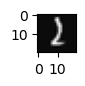

In [45]:
# Prediction
def display_digit(X):
    """ display a single digit. The input is one digit (400,). """
    fig, ax = plt.subplots(1,1, figsize=(0.5,0.5))
    widgvis(fig)
    X_reshaped = X.reshape((20,20)).T
    # Display the image
    ax.imshow(X_reshaped, cmap='gray')
    plt.show()
images_two = x[1015]
display_digit(images_two)

In [46]:
prediction = model.predict(images_two.reshape(1,400))

print(f" predicting a Two: \n{prediction}")
print(f" Largest Prediction index: {np.argmax(prediction)}")

1/1 [==============================] - 0s 135ms/step
 predicting a Two: 
[[ -2.9396365   4.359162    6.9755597   1.8953885 -12.007964   -7.529146
   -2.816035    2.0442307  -2.6570923  -7.6748915]]
 Largest Prediction index: 2


In [47]:
prediction_p = tf.nn.softmax(prediction)

print(f" predicting a Two. Probability vector: \n{prediction_p}")
print(f"Total of predictions: {np.sum(prediction_p):0.3f}")

 predicting a Two. Probability vector: 
[[4.5476387e-05 6.7237861e-02 9.2023993e-01 5.7228291e-03 5.2415681e-09
  4.6194211e-07 5.1459509e-05 6.6412860e-03 6.0324444e-05 3.9929213e-07]]
Total of predictions: 1.000


In [48]:
yhat = np.argmax(prediction_p)

print(f"np.argmax(prediction_p): {yhat}")

np.argmax(prediction_p): 2


1/1 [==============================] - 0s 32ms/step


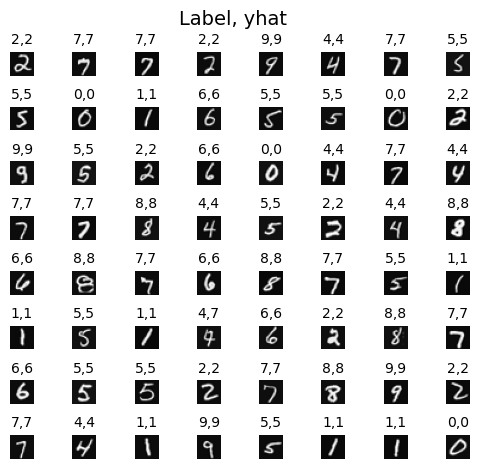

In [30]:
warnings.simplefilter(action='ignore', category=FutureWarning)
m, n = x.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]
widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = x[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(x[random_index].reshape(1,400))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()

In [49]:
def display_errors(model,X,y):
    f = model.predict(X)
    yhat = np.argmax(f, axis=1)
    doo = yhat != y[:,0]
    idxs = np.where(yhat != y[:,0])[0]
    if len(idxs) == 0:
        print("no errors found")
    else:
        cnt = min(8, len(idxs))
        fig, ax = plt.subplots(1,cnt, figsize=(5,1.2))
        fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.80]) #[left, bottom, right, top]
        widgvis(fig)

        for i in range(cnt):
            j = idxs[i]
            X_reshaped = X[j].reshape((20,20)).T

            # Display the image
            ax[i].imshow(X_reshaped, cmap='gray')

            # Predict using the Neural Network
            prediction = model.predict(X[j].reshape(1,400))
            prediction_p = tf.nn.softmax(prediction)
            yhat = np.argmax(prediction_p)

            # Display the label above the image
            ax[i].set_title(f"{y[j,0]},{yhat}",fontsize=10)
            ax[i].set_axis_off()
            fig.suptitle("Label, yhat", fontsize=12)
    return(len(idxs))

1/1 [==============================] - 0s 48ms/step
26 errors out of 5000 images


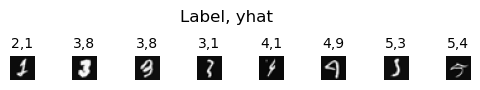

In [50]:
print( f"{display_errors(model,x,y)} errors out of {len(x)} images")

In [51]:
# Data done with Coursera ML course 2

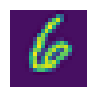

In [52]:
from fastai.vision.all import *
# See some data
show_image(x[3000].reshape(20,20).T)
plt.show()

In [55]:
prediction = model.predict(x[3000].reshape(1,400))

print(f" predicting a Two: \n{prediction}")
print(f" Largest Prediction index: {np.argmax(prediction)}")

1/1 [==============================] - 0s 41ms/step
 predicting a Two: 
[[ -1.969686    -4.48328     -0.24568447  -6.839289    -3.5070891
   -5.7639556   14.72653    -11.420113    -2.155776    -5.105761  ]]
 Largest Prediction index: 6
